# Testing out the NSRDB API for various data requests


In [72]:
# All the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_theme(style='darkgrid')

import os, random, datetime
import requests, json
import wget, zipfile


## First entry point - NSRDB Data query

Returns information on the closest NSRDB datasets for a location including a set of links that can be used to download the data.

Go here for details 
https://developer.nrel.gov/docs/solar/nsrdb/nsrdb_data_query/

In [13]:
# Shobhan's API Key
API_KEY = 'XMztmE3W4phVNTgREWlhLJkn4MkF1erdOtKhbxCx'
# Lat Lon for Dhanal Kalan Akal Academy
lat, lon = 31.262328, 75.559109

# Base API for NSRDB Data Query
# Returns information on the closest NSRDB datasets for a location 
# including a set of links that can be used to download the data
# Go here for detailed info https://developer.nrel.gov/docs/solar/nsrdb/nsrdb_data_query/
url = 'https://developer.nrel.gov/api/solar/nsrdb_data_query.json?'

# Needs API Key
url = url + 'api_key={}'.format(API_KEY)
# and WKT POINT representation - here we will use longitude and latitude 
url = url + '&wkt=POINT({}%20{})'.format(lon, lat)

try: 
    response = requests.request("GET", url)
    response.raise_for_status()
    json_response = response.json()
    for key, value in json_response.items():
        print('Key : ', key, '\tValues: ', value)
    
except Exception as err:
    print('Something went wrong: {err}')


Key :  inputs 	Values:  {'wkt': 'POINT(75.559109 31.262328)'}
Key :  metadata 	Values:  {'version': '1.0.0', 'resultset': {'count': 1}}
Key :  status 	Values:  200
Key :  outputs 	Values:  [{'apiDocs': 'https://developer.nrel.gov/docs/solar/nsrdb/suny_data_download/', 'apiUrl': 'http://developer.nrel.gov/api/solar/suny_india_download', 'availableIntervals': [60], 'availableYears': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 'tmy'], 'displayName': 'SUNY International', 'metadataLink': 'https://nsrdb.nrel.gov/international-datasets', 'name': 'suny-international', 'ranking': 20, 'type': 'satellite', 'links': [{'year': 2000, 'interval': 60, 'link': 'http://developer.nrel.gov/api/solar/suny_india_download.csv?names=2000&wkt=POINT%2875.559109+31.262328%29&interval=60&api_key=yourapikey&email=youremail'}, {'year': 2001, 'interval': 60, 'link': 'http://developer.nrel.gov/api/solar/suny_india_download.csv?names=2001&wkt=POINT%2875.559109+31.262328%

**Looks like hourly SUNY data till 2014 & TMY is available**

In [14]:
json_response['outputs']

[{'apiDocs': 'https://developer.nrel.gov/docs/solar/nsrdb/suny_data_download/',
  'apiUrl': 'http://developer.nrel.gov/api/solar/suny_india_download',
  'availableIntervals': [60],
  'availableYears': [2000,
   2001,
   2002,
   2003,
   2004,
   2005,
   2006,
   2007,
   2008,
   2009,
   2010,
   2011,
   2012,
   2013,
   2014,
   'tmy'],
  'displayName': 'SUNY International',
  'metadataLink': 'https://nsrdb.nrel.gov/international-datasets',
  'name': 'suny-international',
  'ranking': 20,
  'type': 'satellite',
  'links': [{'year': 2000,
    'interval': 60,
    'link': 'http://developer.nrel.gov/api/solar/suny_india_download.csv?names=2000&wkt=POINT%2875.559109+31.262328%29&interval=60&api_key=yourapikey&email=youremail'},
   {'year': 2001,
    'interval': 60,
    'link': 'http://developer.nrel.gov/api/solar/suny_india_download.csv?names=2001&wkt=POINT%2875.559109+31.262328%29&interval=60&api_key=yourapikey&email=youremail'},
   {'year': 2002,
    'interval': 60,
    'link': 'htt

## Solar dataset query

Returns information on the closest climate data for a location

Details here https://developer.nrel.gov/docs/solar/data-query-v1/

In [6]:

# Details here https://developer.nrel.gov/docs/solar/data-query-v1/
url = 'https://developer.nrel.gov/api/solar/data_query/v1.json?'

# Needs API Key
url = url + 'api_key={}'.format(API_KEY)
# and WKT POINT representation - here we will use longitude and latitude 
url = url + '&lon={}&lat={}'.format(lon, lat)

try: 
    response = requests.request("GET", url)
    response.raise_for_status()
    json_response = response.json()
    for key, value in json_response.items():
        print('Key : ', key, '\tValues: ', value)
    
except Exception as err:
    print('Something went wrong: {err}')



Key :  version 	Values:  1.3.2
Key :  warnings 	Values:  ['No tmy2 data found for lat=31.262328 lon=75.559109', 'No tmy3 data found for lat=31.262328 lon=75.559109', 'No intl data found for lat=31.262328 lon=75.559109']
Key :  errors 	Values:  []
Key :  metadata 	Values:  {}
Key :  inputs 	Values:  {'lat': '31.262328', 'lon': '75.559109'}
Key :  outputs 	Values:  {'tmy2': None, 'tmy3': None, 'intl': None, 'nsrdb': {'id': '3-E075N031-E7555N3125', 'city': '', 'state': 'Punjab', 'country': 'India', 'lat': 31.25, 'lon': 75.55, 'distance': 1621, 'timezone': 6, 'elevation': 0, 'resolution': 10}, 'IN': {'id': 'C_0-74E30N-075553125', 'city': 'satellitedata', 'state': ' ??', 'timezone': 5.5, 'lat': 31.25, 'lon': 75.55, 'elevation': 224, 'distance': 1621}}


## Response output shows the station info closest to Dhanal Kalan 

*The lon / lat shows it's in Jalandar*


In [7]:
json_response['outputs']

{'tmy2': None,
 'tmy3': None,
 'intl': None,
 'nsrdb': {'id': '3-E075N031-E7555N3125',
  'city': '',
  'state': 'Punjab',
  'country': 'India',
  'lat': 31.25,
  'lon': 75.55,
  'distance': 1621,
  'timezone': 6,
  'elevation': 0,
  'resolution': 10},
 'IN': {'id': 'C_0-74E30N-075553125',
  'city': 'satellitedata',
  'state': ' ??',
  'timezone': 5.5,
  'lat': 31.25,
  'lon': 75.55,
  'elevation': 224,
  'distance': 1621}}

## Now let's check the SUNY INDIA database (referenced in the first query)

Collect and download, as CSV, a configurable set of solar and meteoroligical data fields from The NSRDB

Details here - https://developer.nrel.gov/docs/solar/nsrdb/suny-india-data-download/

In [98]:
# Let's just look at one year for now
years=2014
# For notification and download link of data 
email='shobhanb@gmail.com'
# Want data converted to IST
utc='false'
# Add leap day data
leap_day='true'


# Details here https://developer.nrel.gov/docs/solar/nsrdb/suny-india-data-download/
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/suny-india-download.json?'

url = url + 'api_key={}'.format(API_KEY)
url = url + '&wkt=POINT({}%20{})'.format(lon, lat)
url = url + '&names={}'.format(years)
url = url + '&email={}'.format(email)
url = url + '&utc={}'.format(utc)
url = url + '&leap_day={}'.format(leap_day)

print(url)

try: 
    response = requests.request("GET", url)
    response.raise_for_status()
    json_response = response.json()
    for key, value in json_response.items():
        print('Key : ', key, '\tValues: ', value)
    
except Exception as err:
    print('Something went wrong: {err}')


https://developer.nrel.gov/api/nsrdb/v2/solar/suny-india-download.json?api_key=XMztmE3W4phVNTgREWlhLJkn4MkF1erdOtKhbxCx&wkt=POINT(75.559109%2031.262328)&names=2014&email=shobhanb@gmail.com&utc=false&leap_day=true
Key :  inputs 	Values:  {'wkt': 'POINT(75.559109 31.262328)', 'names': '2014', 'email': 'shobhanb@gmail.com', 'utc': 'false', 'leap_day': 'true'}
Key :  metadata 	Values:  {'version': '2.0.0', 'resultset': {'count': 1}}
Key :  status 	Values:  200
Key :  outputs 	Values:  {'message': 'File generation in progress. An email will be sent to shobhanb@gmail.com when the download is ready.', 'downloadUrl': 'https://mapfiles.nrel.gov/data/solar/2c2cc7922e109180b2511a9ea24978b9.zip'}
Key :  errors 	Values:  []


In [103]:
dk_data_url = json_response['outputs']['downloadUrl']
DOWNLOAD_FOLDER = '/storage/solar/data'

zipfilepath = wget.download(dk_data_url, os.path.join(DOWNLOAD_FOLDER))


In [104]:
!ls /storage/solar/data


2c2cc7922e109180b2511a9ea24978b9.zip


In [105]:
with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
    zip_ref.extractall(DOWNLOAD_FOLDER)


In [106]:
!ls -l /storage/solar/data/

total 632
drwxr-xr-x 2 root root   4096 Sep 21 17:12 2c2cc7922e109180b2511a9ea24978b9
-rw-r--r-- 1 root root 642624 Sep 21 17:11 2c2cc7922e109180b2511a9ea24978b9.zip


In [107]:
!ls -l /storage/solar/data/2c2cc7922e109180b2511a9ea24978b9

total 1504
-rw-r--r-- 1 root root 1536875 Sep 21 17:12 28312_31.25_75.55_2014.csv


In [108]:
FILEPATH = 'storage/solar/data/2c2cc7922e109180b2511a9ea24978b9/28312_31.25_75.55_2014.csv'

# Top 2 lines contain info about the source etc.
df_2014_info = pd.read_csv(FILEPATH, nrows=1)

df_2014_info


,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,NSRDB,28312,-,-,-,31.25,75.55,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown


In [109]:
df_2014 = pd.read_csv(FILEPATH, skiprows=2)

df_2014.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,Fill Flag,GHI,GHI Perez,Relative Humidity,Snow Depth,Solar Zenith Angle,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2014,1,1,0,0,9.757887,0,0,0,-13,...,0,0,0,17.490754,0,171.806517,991.850525,0.523038,44.977943,1.825089
1,2014,1,1,1,0,9.373333,0,0,0,-12,...,0,0,0,20.520342,0,164.537145,991.682251,0.552856,40.177368,1.563668
2,2014,1,1,2,0,9.045431,0,0,0,-12,...,0,0,0,19.846563,0,152.376042,991.158020,0.576333,36.715889,1.387065
3,2014,1,1,3,0,8.758810,0,0,0,-10,...,0,0,0,24.135126,0,139.614748,990.583557,0.597101,34.041454,1.294565
4,2014,1,1,4,0,8.537960,0,0,0,-11,...,0,0,0,23.172254,0,126.823444,990.572876,0.614298,31.965858,1.240892


In [110]:
df_2014.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,Fill Flag,GHI,GHI Perez,Relative Humidity,Snow Depth,Solar Zenith Angle,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,8760.0,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2014.0,6.526027,15.720548,11.500000,0.0,27.405202,98.461758,213.296804,237.597831,4.121005,...,0.002511,208.472717,208.738242,29.201084,0.0,89.730634,981.949049,2.089472,236.798468,1.901923
std,0.0,3.448048,8.796749,6.922582,0.0,10.578163,119.266590,263.358739,310.517832,12.607160,...,0.070831,288.303915,289.062576,20.257954,0.0,40.363983,7.686611,1.605832,99.387251,0.877494
min,2014.0,1.000000,1.000000,0.000000,0.0,4.729084,0.000000,0.000000,0.000000,-43.000000,...,0.000000,0.000000,0.000000,0.431381,0.0,7.813308,963.374207,0.084360,0.020126,0.025583
25%,2014.0,4.000000,8.000000,5.750000,0.0,18.993666,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,0.000000,12.884132,0.0,55.900498,975.508209,0.753937,166.300270,1.258184
50%,2014.0,7.000000,16.000000,11.500000,0.0,28.248187,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,25.057348,0.0,90.004277,983.525146,1.664917,276.352600,1.868171
75%,2014.0,10.000000,23.000000,17.250000,0.0,35.067883,205.000000,481.000000,492.250000,14.000000,...,0.000000,412.250000,412.000000,40.064604,0.0,123.725572,988.420975,3.061952,313.053116,2.449330
max,2014.0,12.000000,31.000000,23.000000,0.0,50.872152,396.000000,772.000000,988.000000,27.000000,...,2.000000,988.000000,990.000000,100.000000,0.0,172.146206,998.942627,6.768929,359.999542,5.916828


In [111]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8760 non-null   int64  
 1   Month               8760 non-null   int64  
 2   Day                 8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Minute              8760 non-null   int64  
 5   Temperature         8760 non-null   float64
 6   Clearsky DHI        8760 non-null   int64  
 7   Clearsky DNI        8760 non-null   int64  
 8   Clearsky GHI        8760 non-null   int64  
 9   Dew Point           8760 non-null   int64  
 10  DHI                 8760 non-null   int64  
 11  DHI Perez           8760 non-null   int64  
 12  DNI                 8760 non-null   int64  
 13  DNI Perez           8760 non-null   object 
 14  Fill Flag           8760 non-null   int64  
 15  GHI                 8760 non-null   int64  
 16  GHI Pe

In [112]:

df_2014['datetime'] = pd.to_datetime(df_2014[['Year', 'Month', 'Day', 'Hour', 'Minute']])

df_2014.set_index('datetime')

df_2014.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,GHI,GHI Perez,Relative Humidity,Snow Depth,Solar Zenith Angle,Pressure,Precipitable Water,Wind Direction,Wind Speed,datetime
0,2014,1,1,0,0,9.757887,0,0,0,-13,...,0,0,17.490754,0,171.806517,991.850525,0.523038,44.977943,1.825089,2014-01-01 00:00:00
1,2014,1,1,1,0,9.373333,0,0,0,-12,...,0,0,20.520342,0,164.537145,991.682251,0.552856,40.177368,1.563668,2014-01-01 01:00:00
2,2014,1,1,2,0,9.045431,0,0,0,-12,...,0,0,19.846563,0,152.376042,991.158020,0.576333,36.715889,1.387065,2014-01-01 02:00:00
3,2014,1,1,3,0,8.758810,0,0,0,-10,...,0,0,24.135126,0,139.614748,990.583557,0.597101,34.041454,1.294565,2014-01-01 03:00:00
4,2014,1,1,4,0,8.537960,0,0,0,-11,...,0,0,23.172254,0,126.823444,990.572876,0.614298,31.965858,1.240892,2014-01-01 04:00:00


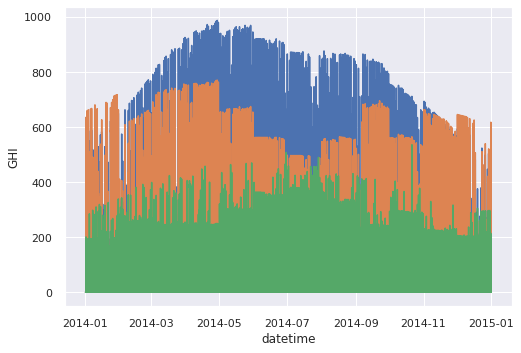

In [113]:

sns.lineplot(x='datetime', y='GHI', data=df_2014)
sns.lineplot(x='datetime', y='DNI', data=df_2014)
sns.lineplot(x='datetime', y='DHI', data=df_2014)

plt.show()


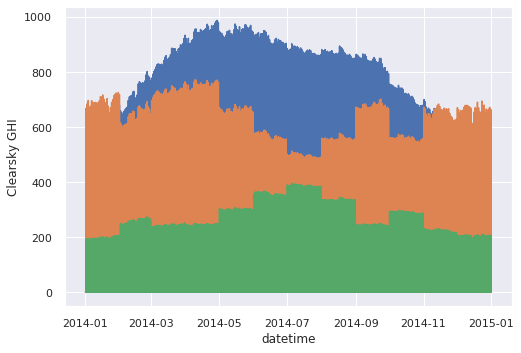

In [114]:

sns.lineplot(x='datetime', y='Clearsky GHI', data=df_2014)
sns.lineplot(x='datetime', y='Clearsky DNI', data=df_2014)
sns.lineplot(x='datetime', y='Clearsky DHI', data=df_2014)

plt.show()


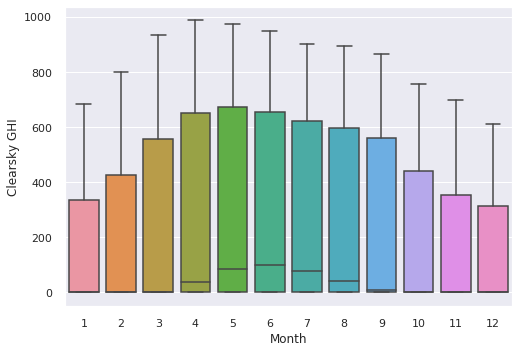

In [115]:

sns.boxplot(x='Month', y='Clearsky GHI',  data=df_2014)

plt.show()


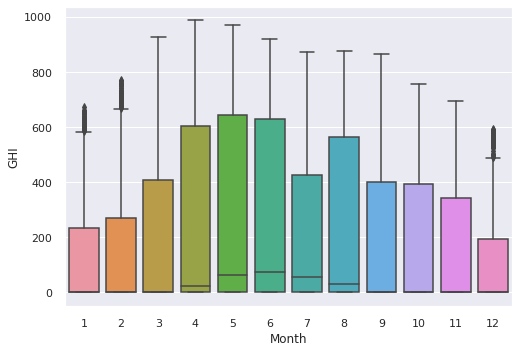

In [116]:

sns.boxplot(x='Month', y='GHI',  data=df_2014)

plt.show()


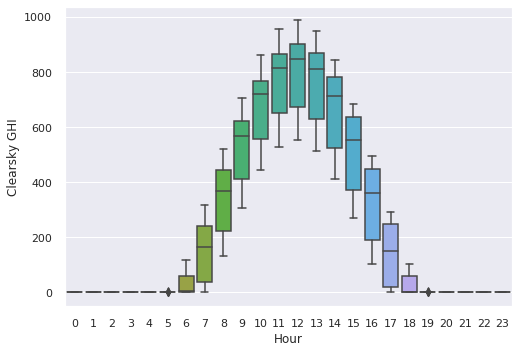

In [117]:

sns.boxplot(x='Hour', y='Clearsky GHI',  data=df_2014)

plt.show()


In [118]:
df_2014.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Dew Point             0
DHI                   0
DHI Perez             0
DNI                   0
DNI Perez             0
Fill Flag             0
GHI                   0
GHI Perez             0
Relative Humidity     0
Snow Depth            0
Solar Zenith Angle    0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
datetime              0
dtype: int64


# Concluding thoughts

Disappointed that only data till 2014 is available

FWIW - 
* Data looks clean
* It should be interesting to look at the various solar metrics and see what correlates with actual power output

## Next steps 

* Look for other data sources for more recent solar data in India
* Look at PVWatts / SAM PV output data as well


